# Questionário Trabalho prático 3

### 2 - Considerando o desenvolvimento do trabalho prático 3, apresente em anexo a figura que descreve o gráfico de correlação entre os indicadores "GDP per capita growth (annual %)" e "Inflation, consumer prices (annual %)" no Brasil, entre os anos de 1970 e 2010.

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,6.040942,8.559465,9.351014,11.266916,6.463068,2.723123,7.199403,2.145854,0.811368,4.271798,...,-0.015059,1.680367,-0.1512,4.468262,1.9991,2.809653,4.951448,4.030945,-1.108159,6.489929


,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.840359,8.450164,14.71492,6.597185,6.869537,4.183568,3.641273,5.678594,4.888035,5.038727


'BRA'

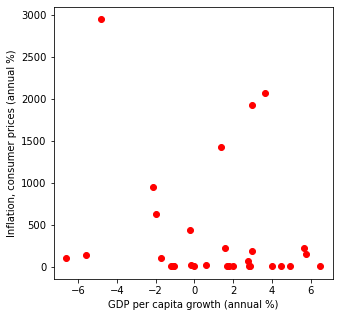

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import sys

caminho: str = '../'
arquivo: str = 'WDIData.csv'

df_completo = pd.read_csv(caminho + arquivo)

filtro_pais: list[str] = ['BRA']
query_pais = '`Country Code` in @filtro_pais'
df_filtrado_pais = df_completo.query(query_pais).reset_index(drop=True)


filtro_indicador1: list[str] = ['GDP per capita growth (annual %)']
query_indicador1 = '`Indicator Name` in @filtro_indicador1'
df_filtrado_indicador1 = df_filtrado_pais.query(
    query_indicador1).reset_index(drop=True)

# display(df_filtrado_indicador1)

df_filtrado_periodo1 = df_filtrado_indicador1
for coluna in df_filtrado_indicador1:
    # apago colunas não numericas
    if not (coluna.isnumeric()):
        df_filtrado_periodo1 = df_filtrado_periodo1.drop([coluna], axis=1)
    else:
        # apago periodo fora da faixa escolhida
        if(int(coluna) < 1970 or int(coluna) > 2010):
            df_filtrado_periodo1 = df_filtrado_periodo1.drop([coluna], axis=1)

display(df_filtrado_periodo1)

filtro_indicador2: list[str] = ['Inflation, consumer prices (annual %)']
query_indicador2 = '`Indicator Name` in @filtro_indicador2'
df_filtrado_indicador2 = df_filtrado_pais.query(
    query_indicador2).reset_index(drop=True)

# display(df_filtrado_indicador2)

df_filtrado_periodo2 = df_filtrado_indicador2
for coluna in df_filtrado_indicador2:
    # apago colunas não numericas
    if not (coluna.isnumeric()):
        df_filtrado_periodo2 = df_filtrado_periodo2.drop([coluna], axis=1)
    else:
        # apago periodo fora da faixa escolhida
        if(int(coluna) < 1970 or int(coluna) > 2010):
            df_filtrado_periodo2 = df_filtrado_periodo2.drop([coluna], axis=1)

display(df_filtrado_periodo2)


# garantindo que tenham o mesmo tamanho as séries
if len(df_filtrado_periodo1.columns) != len(df_filtrado_periodo2.columns):
    print("Tamanhos das séries diferentes, utilizar outra estratégia.")
    sys.exit()


series_indicador1 = []
for coluna, linha in df_filtrado_periodo1.iterrows():
    serie = linha.to_frame().T
    series_indicador1.append(serie)

series_indicador2 = []
for coluna, linha in df_filtrado_periodo2.iterrows():
    serie = linha.to_frame().T
    series_indicador2.append(serie)

df_indicadores_unidos_da_america = pd.DataFrame(
    {
        'indicador1': series_indicador1,
        'indicador2': series_indicador2,
        'pais': filtro_pais
    }
)

for coluna, linha in df_indicadores_unidos_da_america.iterrows():
    x = linha.T['indicador1']
    y = linha.T['indicador2']
    display(linha['pais'])
    plt.figure(figsize=(5, 5))
    plt.xlabel(filtro_indicador1[0])
    plt.ylabel(filtro_indicador2[0])
    plt.scatter(x, y, c='red')
    plt.show()
